<a href="https://colab.research.google.com/github/minm15/ML_2023FALL/blob/main/ML_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from google.colab import drive
import random
import numpy as np
import matplotlib.pyplot as plt
import copy

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url = "https://www.csie.ntu.edu.tw/~htlin/course/ml23fall/hw1/hw1_train.dat"

response = requests.get(url)

file_path = '/content/drive/My Drive/data.dat'
if response.status_code == 200:
    with open(file_path, "wb") as f:
        f.write(response.content)

In [ ]:
with open(file_path, "r") as f:
    lines = f.readlines()

X = []
Y = []
for line in lines:
    if not line.strip():
        continue

    values = line.strip().split()
    x = [float(v) for v in values[:-1]]
    y = int(values[-1])
    X.append(x)
    Y.append(y)

In [ ]:
print(len(X[0]))
for x in X:
    x.insert(0, 1)
print(len(X[0]))

12
13


#PLA


In [ ]:
def PLA(X, Y, offset):
    #sign = lambda a: (a>0) - (a<0)
    update_list = [0]*1000
    for i in range(1000):
        # offset is used to adjust seed
        random.seed(i+offset)
        W = [0]*len(X[0])
        cnt = 0
        update = 0

        while(cnt < 5*256):
            # random pick one number from 0-255
            r_num = random.randint(0, 255)

            x = X[r_num]
            y = Y[r_num]
            sign = np.sign(np.dot(W, x))
            # check if sign(wx) == y
            if sign == y:
                cnt+=1
            else:
                cnt = 0
                update += 1
                u = np.multiply(x, y)
                W = np.add(W, u)

        update_list[i] = update
        if (i+1)%100 == 0:
            print('update', i+1, 'times')
        if i+1==1000:
          print(W)

    return update_list

In [ ]:
def draw_hist(update_list, title):
    plt.hist(update_list, bins=100, edgecolor='k', alpha=0.7)
    plt.xlabel('update times')
    plt.ylabel('number')
    plt.title(title)
    plt.show()

    median = np.median(update_list)
    print('median number of updates:', median)

# 第9題

In [ ]:
X_9 = copy.deepcopy(X)
update_list_9 = PLA(X_9, Y, 0)

update 100 times
update 200 times
update 300 times
update 400 times
update 500 times
update 600 times
update 700 times
update 800 times
update 900 times
update 1000 times
[   97.           264.90936576 -1473.27841386  1676.67293034
 -1598.56311561  -935.767444   -2289.05149015  1391.92751828
  -941.90564774  -394.42712787  1248.20914659  -505.30424727
  -819.64551294]


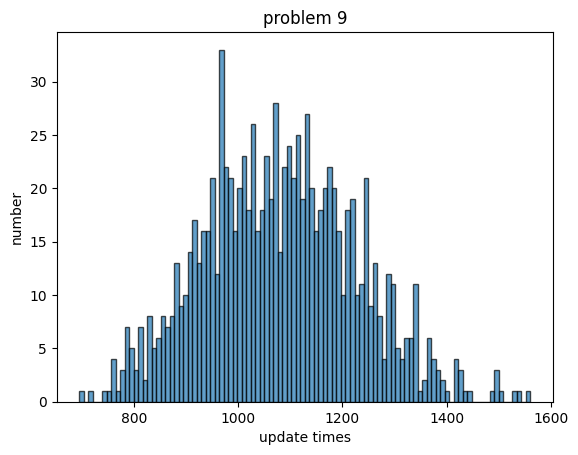

median number of updates: 1074.5


In [ ]:
draw_hist(update_list_9, "problem 9")

# 第10題


In [ ]:
# set x0=11.26 for every x in X
X_10 = copy.deepcopy(X)
print(X_10[1])
for x in X_10:
    x[:] = np.multiply(x, 11.26)
print(X_10[1])

[1, 67.28190133280849, -3.4521095935884074, 44.394048571163765, -6.464176543928692, 30.73343814024286, -14.561703488955343, 14.793258428258412, 57.997708970331225, 13.155526635618273, 43.45232733013814, 40.88921223521525, 75.71112320125242]
[11.26, 757.5942090074236, -38.87075402380547, 499.87698691130396, -72.78662788463707, 346.0585134591346, -163.96478128563717, 166.5720899021897, 653.0542030059296, 148.13122991706175, 489.27320573735545, 460.41252976852365, 852.5072472461022]


In [ ]:
update_list_10 = PLA(X_10, Y, 0)

update 100 times
update 200 times
update 300 times
update 400 times
update 500 times
update 600 times
update 700 times
update 800 times
update 900 times
update 1000 times
[  1092.22         2982.87945841 -16589.11494006  18879.33719558
 -17999.82068175 -10536.74141943 -25774.71977904  15673.10385581
 -10605.85759356  -4441.2494598   14054.83499066  -5689.7258243
  -9229.20847571]


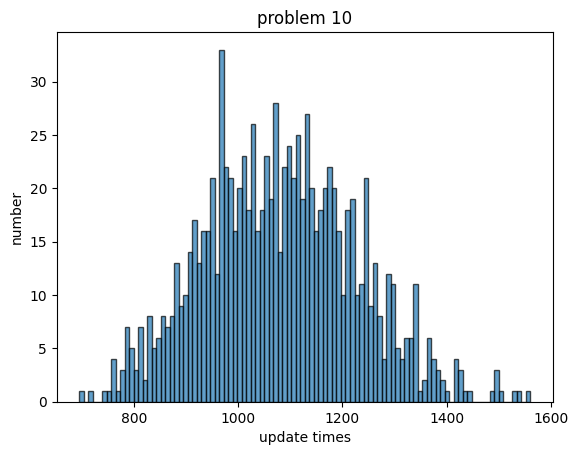

median number of updates: 1074.5


In [ ]:
draw_hist(update_list_10, "problem 10")

In [ ]:
def same_updates(list_9, list_10):
    for i in range(len(list_9)):
        if list_9[i] != list_10[i]: return False

    return True

same_updates(update_list_9, update_list_10)

True

In [ ]:
print(update_list_9)
print(update_list_10)

[1132, 1049, 1238, 1007, 1367, 1027, 1037, 1116, 1067, 1048, 1056, 1255, 974, 1215, 1069, 1013, 1196, 1031, 1344, 1100, 866, 899, 1487, 922, 1161, 1130, 1288, 1208, 1225, 1100, 1127, 1181, 1031, 1161, 1134, 1073, 1368, 1253, 1218, 995, 878, 1261, 1188, 1319, 991, 877, 1122, 1222, 959, 931, 1173, 1160, 1171, 919, 1081, 1208, 964, 1290, 1220, 920, 1093, 977, 1164, 1013, 950, 1057, 1265, 932, 829, 813, 1150, 1030, 972, 1087, 1012, 1136, 989, 1121, 920, 788, 1025, 1420, 1300, 1120, 1228, 1133, 1068, 1153, 1155, 1003, 920, 1011, 837, 853, 1249, 1139, 888, 875, 1113, 1338, 1208, 1018, 1130, 1001, 1316, 1089, 1169, 1242, 1074, 954, 1245, 771, 939, 1135, 1265, 1226, 816, 1145, 865, 968, 1014, 1255, 1337, 1071, 799, 1144, 1168, 1041, 1049, 1222, 896, 1029, 956, 946, 943, 1225, 1028, 966, 1337, 968, 1185, 845, 1007, 914, 1074, 909, 1221, 761, 894, 953, 972, 925, 912, 1111, 989, 1050, 1218, 1074, 1264, 1373, 1232, 1369, 1026, 1150, 1120, 955, 1121, 1190, 1101, 888, 1360, 1064, 1086, 1087, 986, 11

# 第11題

In [ ]:
X_11 = copy.deepcopy(X)
print(X_11[0])
for x in X_11:
    x[0] = 11.26
print(X_11[0])

[1, 81.01975695920375, -0.24647068258400448, 53.001506201026736, -4.881393876635416, 42.06109444134342, -9.953608674192033, 18.061001174379342, 72.87812100918133, 16.757591604840254, 52.706566427130866, 53.41780525270596, 91.13173682389531]
[11.26, 81.01975695920375, -0.24647068258400448, 53.001506201026736, -4.881393876635416, 42.06109444134342, -9.953608674192033, 18.061001174379342, 72.87812100918133, 16.757591604840254, 52.706566427130866, 53.41780525270596, 91.13173682389531]


In [ ]:
update_list_11 = PLA(X_11, Y, 3)

update 100 times
update 200 times
update 300 times
update 400 times
update 500 times
update 600 times
update 700 times
update 800 times
update 900 times
update 1000 times
[ 1148.52         218.9769917  -1558.69502808  1773.37962134
 -1743.29957892  -983.9193672  -2438.76059727  1472.94512023
 -1039.36106771  -418.87604905  1317.02097761  -494.40414271
  -930.98866907]


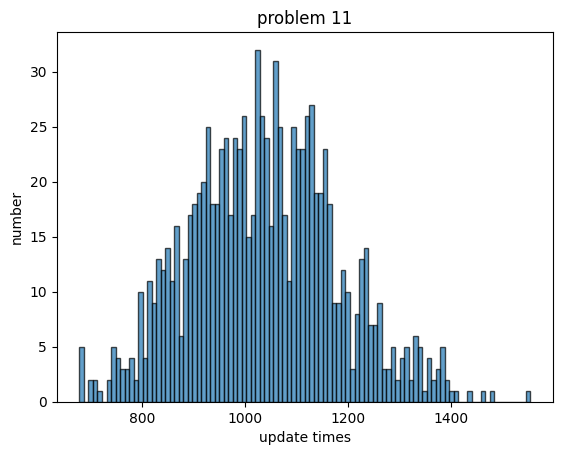

median number of updates: 1032.5


In [ ]:
draw_hist(update_list_11, "problem 11")

In [ ]:
print(update_list_9)


[1132, 1049, 1238, 1007, 1367, 1027, 1037, 1116, 1067, 1048, 1056, 1255, 974, 1215, 1069, 1013, 1196, 1031, 1344, 1100, 866, 899, 1487, 922, 1161, 1130, 1288, 1208, 1225, 1100, 1127, 1181, 1031, 1161, 1134, 1073, 1368, 1253, 1218, 995, 878, 1261, 1188, 1319, 991, 877, 1122, 1222, 959, 931, 1173, 1160, 1171, 919, 1081, 1208, 964, 1290, 1220, 920, 1093, 977, 1164, 1013, 950, 1057, 1265, 932, 829, 813, 1150, 1030, 972, 1087, 1012, 1136, 989, 1121, 920, 788, 1025, 1420, 1300, 1120, 1228, 1133, 1068, 1153, 1155, 1003, 920, 1011, 837, 853, 1249, 1139, 888, 875, 1113, 1338, 1208, 1018, 1130, 1001, 1316, 1089, 1169, 1242, 1074, 954, 1245, 771, 939, 1135, 1265, 1226, 816, 1145, 865, 968, 1014, 1255, 1337, 1071, 799, 1144, 1168, 1041, 1049, 1222, 896, 1029, 956, 946, 943, 1225, 1028, 966, 1337, 968, 1185, 845, 1007, 914, 1074, 909, 1221, 761, 894, 953, 972, 925, 912, 1111, 989, 1050, 1218, 1074, 1264, 1373, 1232, 1369, 1026, 1150, 1120, 955, 1121, 1190, 1101, 888, 1360, 1064, 1086, 1087, 986, 11

In [ ]:
print(update_list_10)

[1132, 1049, 1238, 1007, 1367, 1027, 1037, 1116, 1067, 1048, 1056, 1255, 974, 1215, 1069, 1013, 1196, 1031, 1344, 1100, 866, 899, 1487, 922, 1161, 1130, 1288, 1208, 1225, 1100, 1127, 1181, 1031, 1161, 1134, 1073, 1368, 1253, 1218, 995, 878, 1261, 1188, 1319, 991, 877, 1122, 1222, 959, 931, 1173, 1160, 1171, 919, 1081, 1208, 964, 1290, 1220, 920, 1093, 977, 1164, 1013, 950, 1057, 1265, 932, 829, 813, 1150, 1030, 972, 1087, 1012, 1136, 989, 1121, 920, 788, 1025, 1420, 1300, 1120, 1228, 1133, 1068, 1153, 1155, 1003, 920, 1011, 837, 853, 1249, 1139, 888, 875, 1113, 1338, 1208, 1018, 1130, 1001, 1316, 1089, 1169, 1242, 1074, 954, 1245, 771, 939, 1135, 1265, 1226, 816, 1145, 865, 968, 1014, 1255, 1337, 1071, 799, 1144, 1168, 1041, 1049, 1222, 896, 1029, 956, 946, 943, 1225, 1028, 966, 1337, 968, 1185, 845, 1007, 914, 1074, 909, 1221, 761, 894, 953, 972, 925, 912, 1111, 989, 1050, 1218, 1074, 1264, 1373, 1232, 1369, 1026, 1150, 1120, 955, 1121, 1190, 1101, 888, 1360, 1064, 1086, 1087, 986, 11

In [ ]:
print(update_list_11)

[904, 918, 926, 1264, 1000, 1233, 995, 1013, 1137, 1383, 842, 1025, 1113, 1156, 896, 1138, 928, 867, 908, 1368, 811, 943, 1326, 1258, 1234, 1157, 1203, 1165, 1251, 1074, 1050, 1099, 1030, 1162, 1239, 955, 1093, 1062, 1153, 1220, 1097, 1118, 1032, 961, 1234, 1186, 1070, 1127, 1076, 878, 1126, 950, 1127, 839, 1231, 1130, 888, 917, 918, 1150, 1071, 1045, 1051, 1085, 930, 912, 807, 947, 990, 1060, 1096, 936, 1063, 987, 1017, 1086, 800, 982, 820, 685, 860, 906, 852, 865, 1086, 903, 1017, 920, 957, 841, 878, 1198, 1174, 852, 977, 1058, 1150, 1161, 825, 1075, 1301, 1179, 1140, 1159, 1061, 951, 1392, 1039, 780, 809, 1056, 966, 1193, 1107, 855, 908, 931, 1015, 1074, 753, 1029, 972, 999, 1327, 919, 1022, 1189, 814, 935, 927, 822, 833, 1113, 986, 965, 1226, 929, 1142, 1038, 1011, 946, 1058, 1158, 997, 777, 845, 1026, 924, 1111, 1056, 1117, 1027, 937, 1329, 1027, 1342, 1047, 1113, 1006, 1057, 1063, 1083, 987, 1233, 1072, 985, 1253, 1253, 1228, 943, 1333, 990, 908, 1207, 1232, 1198, 965, 1036, 1096

In [ ]:
def PLA_variant(X, Y, base):
    sign = lambda a: (a>0) - (a<0)
    update_list = [0]*1000
    for i in range(1000):
        # set random seed
        random.seed(i+base)
        W = [0]*len(X[0])
        cnt = 0
        update = 0

        while(cnt < 5*256):
            # random pick one number from 0-255
            r_num = random.randint(0, 255)

            x = X[r_num]
            y = Y[r_num]
            # check if sign(wx) == y
            val = float(np.dot(W, x))
            if sign(val) == y:
                cnt+=1
                continue
            else:
                cnt = 0
                u = np.multiply(x, y)
                # update weight until xn is classified correctly
                while sign(val)!=y:
                    update += 1
                    W = np.add(W, u)
                    # update val with new weight
                    val = float(np.dot(W, x))

        update_list[i] = update
        if (i+1)%100 == 0:
            print('update', i+1, 'times')

    return update_list

In [ ]:
X_12 = copy.deepcopy(X)
update_list_12 = PLA_variant(X_12, Y, 1)

update 100 times
update 200 times
update 300 times
update 400 times
update 500 times
update 600 times
update 700 times
update 800 times
update 900 times
update 1000 times


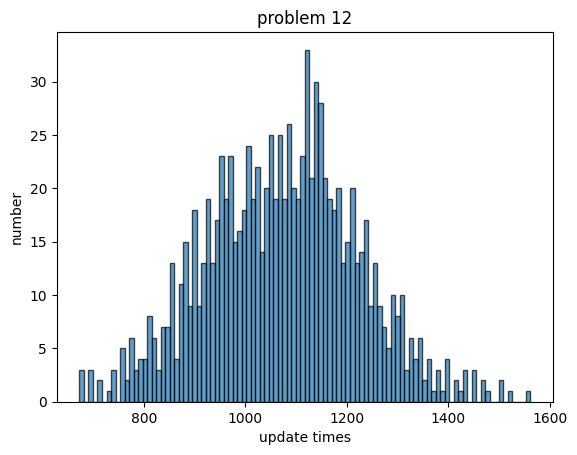

median number of updates: 1078.0


In [ ]:
draw_hist(update_list_12, "problem 12")

In [ ]:
print(update_list_12)

[912, 947, 1008, 989, 1180, 1105, 1255, 960, 1070, 1134, 1221, 1029, 1038, 951, 1175, 1283, 937, 1305, 1395, 1121, 1002, 1264, 894, 971, 1330, 1072, 1087, 1295, 1077, 924, 1088, 1010, 1071, 1252, 1134, 1211, 1294, 1093, 953, 906, 1150, 1301, 1157, 1259, 1039, 1087, 1214, 951, 1141, 1203, 1211, 1086, 963, 1203, 1135, 989, 1008, 1082, 859, 1054, 1133, 951, 951, 1328, 812, 1160, 962, 1013, 857, 1142, 1175, 1017, 1075, 833, 1124, 1011, 1092, 1234, 905, 1273, 834, 674, 1117, 1155, 885, 918, 1176, 968, 1027, 996, 1161, 972, 872, 1230, 1169, 987, 1140, 1208, 1165, 1121, 951, 1104, 914, 1003, 1184, 1299, 1094, 1117, 1310, 1157, 1119, 898, 1057, 1040, 1232, 1165, 938, 1259, 981, 1165, 1117, 774, 902, 1070, 1266, 1124, 1049, 1145, 1250, 1099, 1041, 911, 918, 943, 1010, 1082, 1001, 1328, 915, 1249, 1144, 1015, 950, 1096, 1216, 1037, 986, 919, 952, 918, 971, 1165, 1094, 1080, 1100, 1326, 991, 1171, 1054, 1201, 1015, 947, 1070, 1133, 1183, 1285, 1126, 822, 1397, 1222, 1047, 1047, 1240, 790, 1105, 1